## load data

In [1]:
!wget -q https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip -q cats_and_dogs_filtered.zip

In [2]:
from tensorflow.keras import layers, Sequential
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = "/content/cats_and_dogs_filtered/train"
val_data_dir = "/content/cats_and_dogs_filtered/validation"
img_data_gen = ImageDataGenerator(rescale=1/255., 
                                  zoom_range=0.2, 
                                  rotation_range=0.2, 
                                  width_shift_range=0.2, 
                                  height_shift_range=0.2, 
                                  horizontal_flip=True)

train_ds = img_data_gen.flow_from_directory(train_data_dir,
                                            target_size=(400,400),
                                            class_mode="binary",
                                            batch_size=32)

val_ds = img_data_gen.flow_from_directory(val_data_dir,
                                          target_size=(400,400),
                                          class_mode="binary",
                                          batch_size=32)
sample_imgs, sample_labels = train_ds.next()
count, *input_shape = sample_imgs.shape
train_ds, val_ds, input_shape

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


(<keras.preprocessing.image.DirectoryIterator at 0x7f932ea46bd0>,
 [400, 400, 3])

In [9]:
train_ds.next()

(array([[[[0.47855824, 0.32169548, 0.32561705],
          [0.47698614, 0.3201234 , 0.32404497],
          [0.4660379 , 0.30917516, 0.31309673],
          ...,
          [0.44623587, 0.29146883, 0.28161994],
          [0.4463133 , 0.2916126 , 0.2817416 ],
          [0.4463907 , 0.2917564 , 0.28186324]],
 
         [[0.513377  , 0.35651428, 0.36043584],
          [0.49113637, 0.3342556 , 0.33818617],
          [0.457768  , 0.30086514, 0.30480674],
          ...,
          [0.46946838, 0.3322135 , 0.3155933 ],
          [0.46953475, 0.33227983, 0.31563753],
          [0.46960106, 0.33234617, 0.3156818 ]],
 
         [[0.4447171 , 0.28108716, 0.28839234],
          [0.4478184 , 0.28416637, 0.2914826 ],
          [0.4355109 , 0.27183676, 0.27916402],
          ...,
          [0.4897822 , 0.3525273 , 0.32913584],
          [0.48984855, 0.35259366, 0.3291801 ],
          [0.4899149 , 0.35266   , 0.32922432]],
 
         ...,
 
         [[0.2680912 , 0.35828727, 0.29156953],
          [0.22916

(<matplotlib.image.AxesImage at 0x7f932ea8b510>, (374, 500, 3))

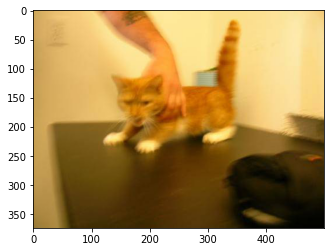

In [10]:
import pandas as pd

plt.imshow(plt.imread(f"{train_data_dir}/cats/cat.0.jpg")), plt.imread(f"{train_data_dir}/cats/cat.0.jpg").shape

In [13]:
from tensorflow.python.keras.layers.core import Dropout
from tensorflow.python.keras.backend import dropout
model = Sequential([
    layers.Conv2D(32, 3, padding="same", activation="relu", input_shape=input_shape),
    layers.MaxPool2D(),
    layers.Dropout(0.1),
    
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Dropout(0.1),
    
    layers.Conv2D(128, 3, padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Dropout(0.1),

    layers.Flatten(),
    layers.Dense(128, activation="relu", name="dense_128"),
    layers.Dense(1, activation="sigmoid", name="output")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 400, 400, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 200, 200, 32)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 200, 200, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 200, 200, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 100, 100, 64)     0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 100, 100, 64)     

In [17]:
history = model.fit(train_ds,
                    epochs=30,
                    validation_data=val_ds,
                    callbacks=[
                      tf.keras.callbacks.EarlyStopping(patience=3, monitor="val_loss"),
                      tf.keras.callbacks.ModelCheckpoint("/content/model_cp/model_1", save_best_only=True)
                    ])

Epoch 1/30
63/63 [==============================] - 202s 3s/step - loss: 0.6998 - accuracy: 0.5160 - val_loss: 0.6928 - val_accuracy: 0.5290
Epoch 2/30
63/63 [==============================] - 114s 2s/step - loss: 0.6894 - accuracy: 0.5430 - val_loss: 0.6913 - val_accuracy: 0.5020
Epoch 3/30
63/63 [==============================] - 114s 2s/step - loss: 0.6885 - accuracy: 0.5295 - val_loss: 0.6844 - val_accuracy: 0.6020
Epoch 4/30
63/63 [==============================] - 113s 2s/step - loss: 0.6862 - accuracy: 0.5535 - val_loss: 0.6823 - val_accuracy: 0.5770
Epoch 5/30
63/63 [==============================] - 131s 2s/step - loss: 0.6896 - accuracy: 0.5500 - val_loss: 0.6855 - val_accuracy: 0.5650
Epoch 6/30
63/63 [==============================] - 142s 2s/step - loss: 0.6771 - accuracy: 0.5765 - val_loss: 0.6854 - val_accuracy: 0.5850
Epoch 7/30
63/63 [==============================] - 144s 2s/step - loss: 0.6753 - accuracy: 0.5765 - val_loss: 0.6902 - val_accuracy: 0.5730
Epoch 8/30
63

In [22]:
import tensorflow_hub as hub
model_1 = Sequential([
  layers.Resizing(224, 224, input_shape=input_shape),
  hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5",
                   trainable=False),
  layers.Dense(128, activation="relu"),  
  layers.Dense(1, activation="sigmoid")  
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 2048)              23564800  
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23,827,201
Trainable params: 262,401
Non-trainable params: 23,564,800
_________________________________________________________________


In [23]:
history_1 = model_1.fit(train_ds,
                    epochs=30,
                    validation_data=val_ds,
                    callbacks=[
                      tf.keras.callbacks.EarlyStopping(patience=5, monitor="val_accuracy"),
                      tf.keras.callbacks.ModelCheckpoint("/content/model_cp/model_2", save_best_only=True)
                    ])

Epoch 1/30
63/63 [==============================] - ETA: 0s - loss: 0.1007 - accuracy: 0.9630INFO:tensorflow:Assets written to: /content/model_cp/model_2/assets


INFO:tensorflow:Assets written to: /content/model_cp/model_2/assets


63/63 [==============================] - 125s 2s/step - loss: 0.1007 - accuracy: 0.9630 - val_loss: 0.0517 - val_accuracy: 0.9830
Epoch 2/30
63/63 [==============================] - ETA: 0s - loss: 0.0353 - accuracy: 0.9855INFO:tensorflow:Assets written to: /content/model_cp/model_2/assets


INFO:tensorflow:Assets written to: /content/model_cp/model_2/assets


63/63 [==============================] - 118s 2s/step - loss: 0.0353 - accuracy: 0.9855 - val_loss: 0.0412 - val_accuracy: 0.9820
Epoch 3/30
63/63 [==============================] - 110s 2s/step - loss: 0.0297 - accuracy: 0.9915 - val_loss: 0.0696 - val_accuracy: 0.9800
Epoch 4/30
63/63 [==============================] - 109s 2s/step - loss: 0.0395 - accuracy: 0.9845 - val_loss: 0.0620 - val_accuracy: 0.9800
Epoch 5/30
63/63 [==============================] - ETA: 0s - loss: 0.0331 - accuracy: 0.9880INFO:tensorflow:Assets written to: /content/model_cp/model_2/assets


INFO:tensorflow:Assets written to: /content/model_cp/model_2/assets


63/63 [==============================] - 118s 2s/step - loss: 0.0331 - accuracy: 0.9880 - val_loss: 0.0313 - val_accuracy: 0.9870
Epoch 6/30
63/63 [==============================] - 110s 2s/step - loss: 0.0199 - accuracy: 0.9960 - val_loss: 0.0536 - val_accuracy: 0.9780
Epoch 7/30
63/63 [==============================] - 109s 2s/step - loss: 0.0107 - accuracy: 0.9965 - val_loss: 0.0454 - val_accuracy: 0.9810
Epoch 8/30
63/63 [==============================] - 116s 2s/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.0715 - val_accuracy: 0.9850
Epoch 9/30
63/63 [==============================] - 112s 2s/step - loss: 0.0124 - accuracy: 0.9945 - val_loss: 0.0784 - val_accuracy: 0.9800
Epoch 10/30
63/63 [==============================] - 110s 2s/step - loss: 0.0240 - accuracy: 0.9925 - val_loss: 0.0597 - val_accuracy: 0.9790
